In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("F:/Downloads/archive (14)/AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
for column in df.columns :
    if df[column].isnull().sum()!= 0 :
       print(f"{column} = missing values: {df[column].isnull().sum()}, dtypes: {df[column].dtypes}")

name = missing values: 16, dtypes: object
host_name = missing values: 21, dtypes: object
last_review = missing values: 10052, dtypes: object
reviews_per_month = missing values: 10052, dtypes: float64


In [7]:
df["last_review"] = pd.to_datetime(df.last_review)

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(df["reviews_per_month"].mean())
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,1.373221,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaT,1.373221,1,23


In [10]:
df["last_review"] = df["last_review"].ffill()

In [11]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


In [12]:
for column in df.columns :
    if df[column].isnull().sum() != 0:
        print(f"{column} = missing values : {df[column].isnull().sum()},dtypes : {df[column].dtypes}")


name = missing values : 16,dtypes : object
host_name = missing values : 21,dtypes : object


In [13]:
for column in df.columns :
    if df[column].isnull().sum() != 0:
        df[column] = df[column].fillna(df[column].mode()[0])

In [14]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
df.head(100) 


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21293,Sunny Apartment in Artist Home,44145,Tyrome,Brooklyn,Bushwick,40.70093,-73.92609,Entire home/apt,105,3,118,2019-06-18,1.050000,2,9
96,21456,Light-filled classic Central Park,42032,Dana,Manhattan,Upper West Side,40.79764,-73.96177,Entire home/apt,140,3,81,2019-07-07,0.710000,1,198
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,2018-10-09,0.110000,1,365
98,21794,COZY QUIET room 4 DOOGLERS!,83257,Olan,Manhattan,Chelsea,40.74008,-74.00271,Private room,98,30,30,2019-05-01,0.270000,2,364


In [16]:
df['revenue'] = df['price'] * df['availability_365']

In [17]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenue
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,54385
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,79875
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,1.373221,1,365,54750
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,17266
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,0


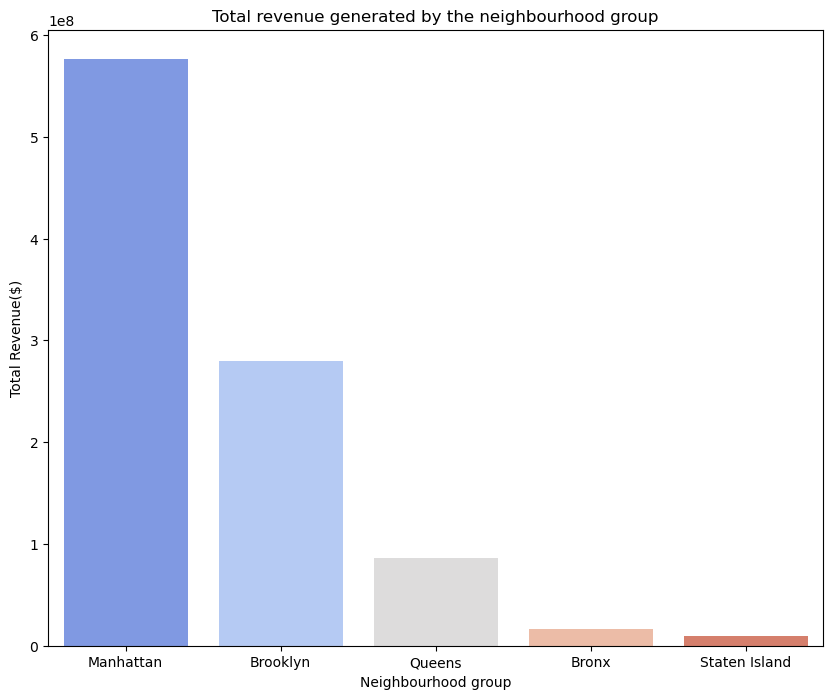

In [18]:
revenue_by_area = df.groupby('neighbourhood_group')['revenue'].sum().sort_values(ascending = False)
#now we are plotting the graph of it
plt.figure(figsize = (10,8))
sns.barplot(x = revenue_by_area.index , y = revenue_by_area.values ,hue = revenue_by_area.index , palette = "coolwarm")
plt.title("Total revenue generated by the neighbourhood group")
plt.xlabel("Neighbourhood group")
plt.ylabel("Total Revenue($)")
plt.show()

 Manhattan generated the highest revenue overall, driven by higher listing prices

# Room type that earns the most

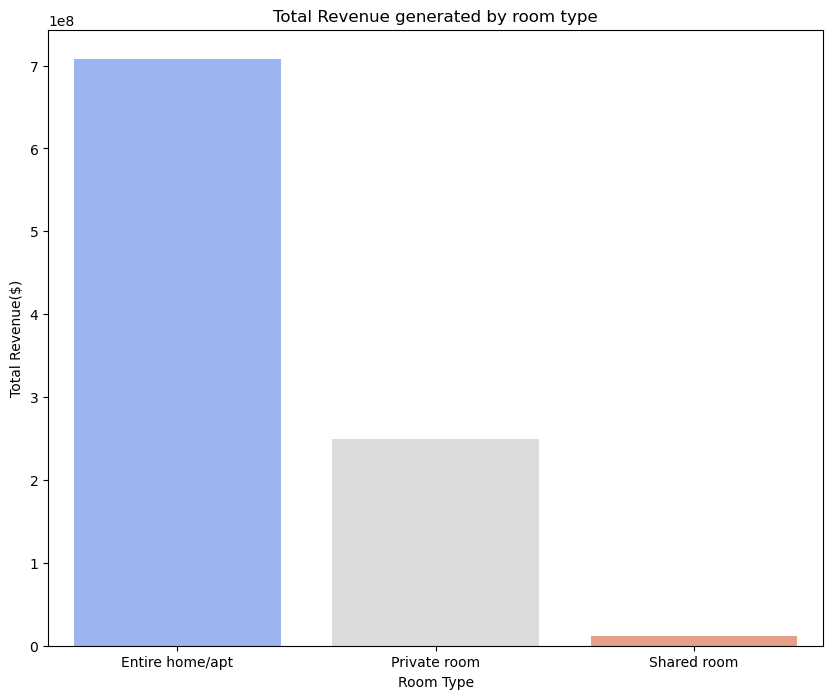

In [19]:
revenue_by_room_type = df.groupby('room_type')['revenue'].sum().sort_values(ascending = False)
# now we are plotting the graph of it
plt.figure(figsize = (10,8))
sns.barplot(x = revenue_by_room_type.index, y = revenue_by_room_type.values ,hue = revenue_by_room_type.index, palette = "coolwarm")
plt.title("Total Revenue generated by room type")
plt.xlabel("Room Type")
plt.ylabel("Total Revenue($)")
plt.show()

Entire home/apt is showing to have generated the most revenue

# Availabilty v/s Revenue

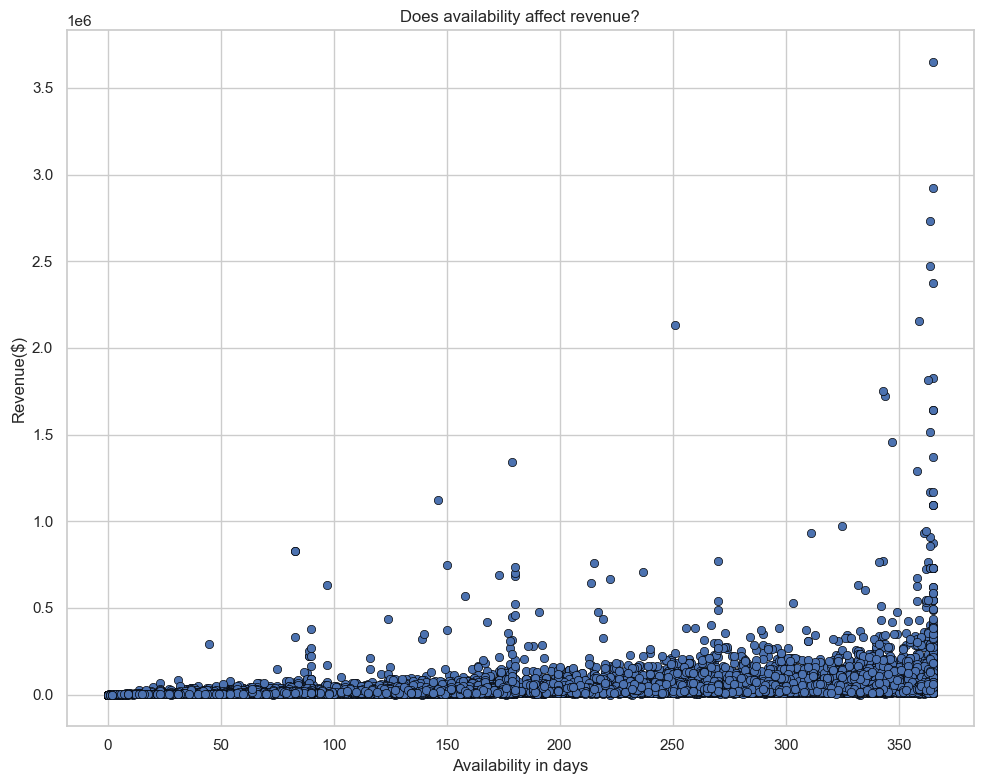

In [20]:
# let's plot the graph of it
plt.figure(figsize=(10,8))
sns.set(style = 'whitegrid')

sns.scatterplot(
    x = df['availability_365'],
    y = df['revenue'],
    edgecolor = 'black'
)

plt.title("Does availability affect revenue?")
plt.xlabel("Availability in days")
plt.ylabel("Revenue($)")
plt.tight_layout()
plt.show()

# Reviews per month v/s revenue

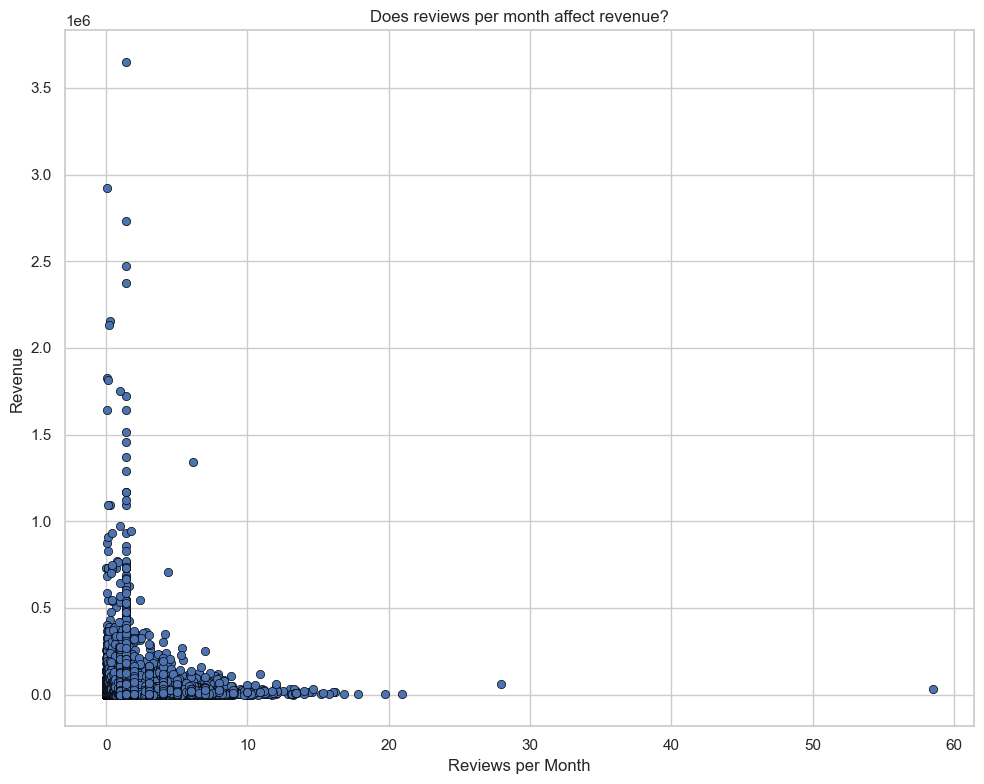

In [21]:
# we are plotting the graph of it
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid')


sns.scatterplot(
    x = df['reviews_per_month'],
    y = df['revenue'],
    edgecolor = "black"
)

plt.title("Does reviews per month affect revenue?")
plt.xlabel("Reviews per Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# How hosts with more listings are affecting the revenue?

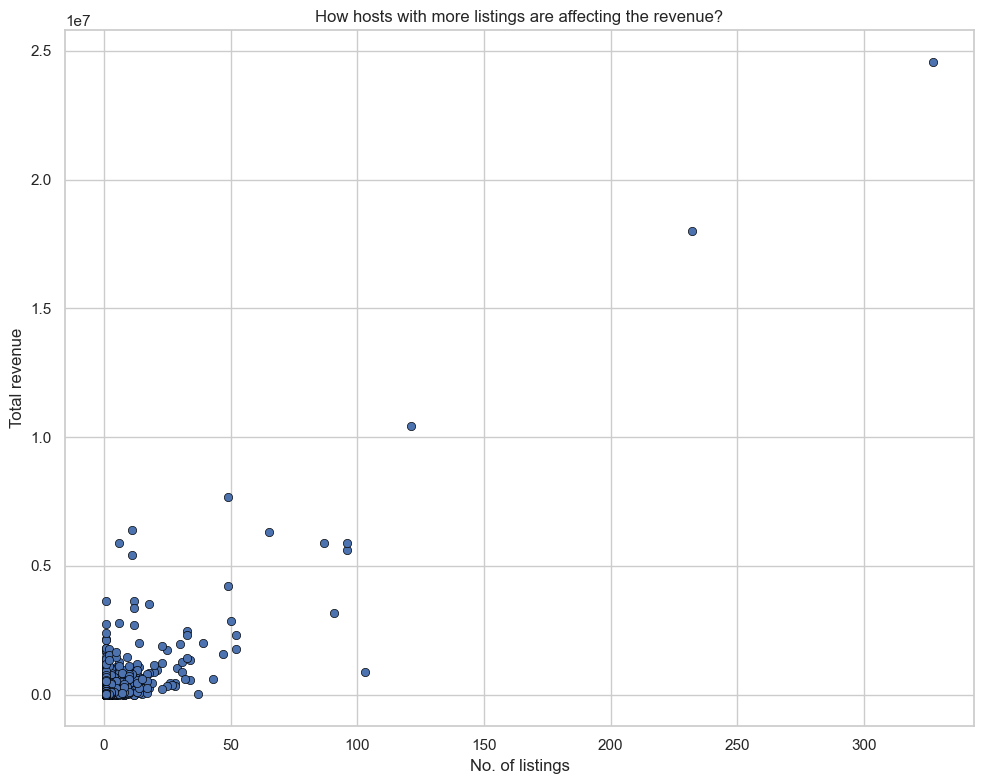

In [22]:
host_ranking = df.groupby('host_id').agg(
    total_revenue = ('revenue','sum'),
    count_of_listing = ('name', 'count')
).reset_index()
# now we are plotting the graph for it
plt.figure(figsize = (10,8))
sns.scatterplot(
     x= host_ranking.count_of_listing,
     y = host_ranking.total_revenue,
     edgecolor = "black"
    
)
plt.title("How hosts with more listings are affecting the revenue?")
plt.xlabel("No. of listings")
plt.ylabel("Total revenue")
plt.tight_layout()
plt.show()
    

Hosts with more listings tend to generate more revenue

 # Do listings with lower minimum nights earn more?

C:\Users\TANIMA\AppData\Local\Temp\ipykernel_24388\381254483.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


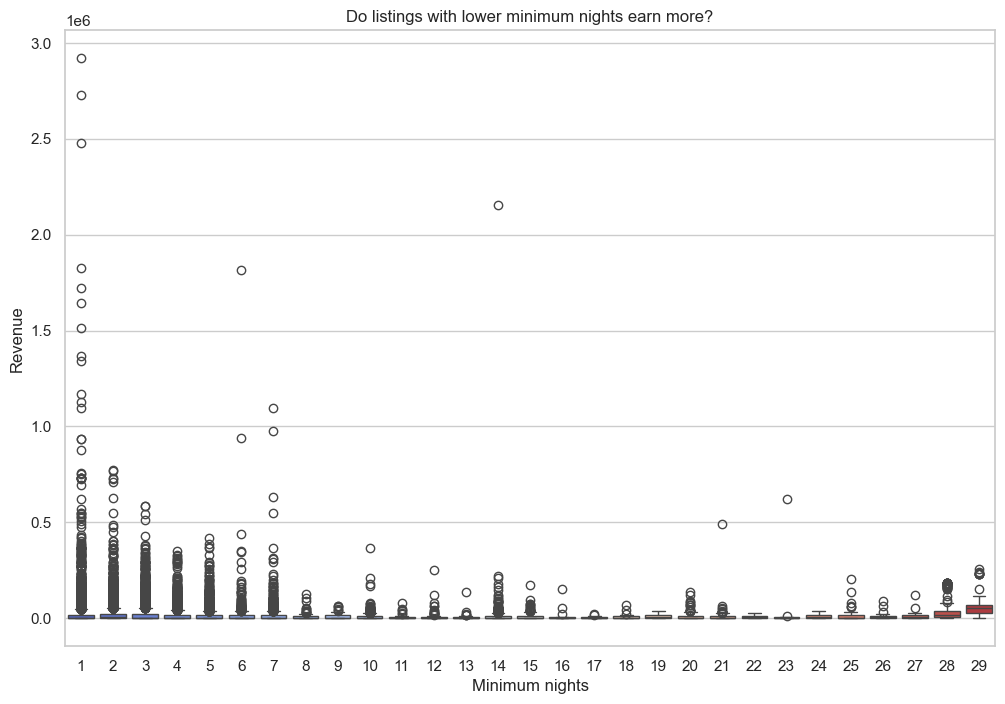

In [23]:
# we are first extracting out the extreme cases for a clearer view. So here, we are only working with listings which have less than 30 nights

new_df = df[df['minimum_nights'] < 30]

# we are plotting teh graph for it
plt.figure(figsize = (12,8))
sns.boxplot(
    data = new_df,
    x = 'minimum_nights',
    y = 'revenue',
    palette = 'coolwarm',
    legend = False
    
)

plt.title("Do listings with lower minimum nights earn more?")
plt.xlabel("Minimum nights")
plt.ylabel("Revenue")
plt.show()

Listings with very lower minimum nights are showing to generate higher revenues

# Neighbourhoods generating the highest revenue

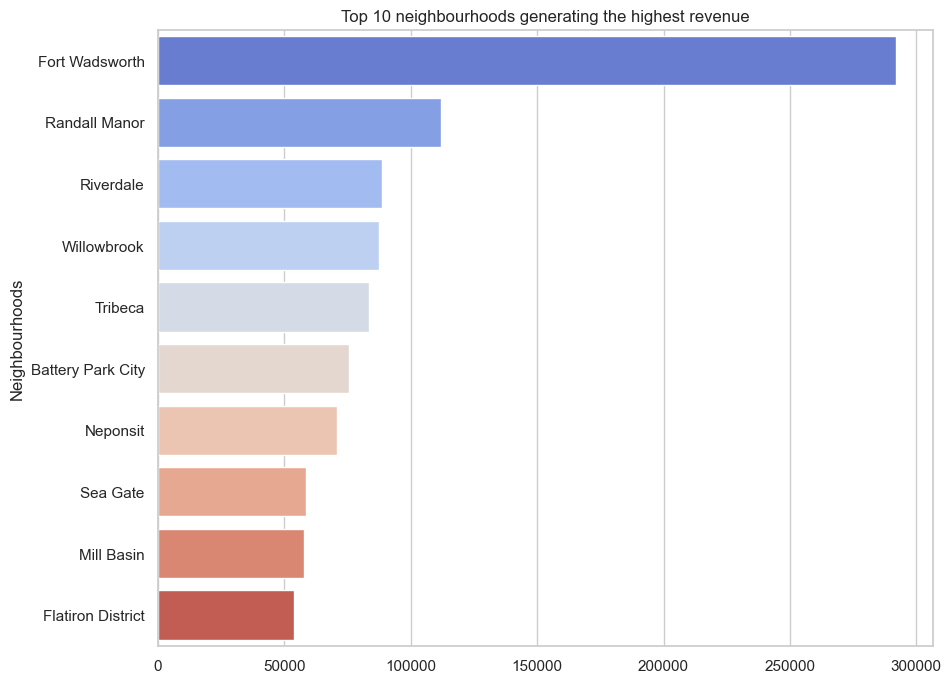

In [24]:
top_10_neighbourhood = df.groupby('neighbourhood')['revenue'].mean().sort_values(ascending = False).head(10)
# now we are plotting the graph for it
plt.figure(figsize = (10,8))
sns.barplot(
    x = top_10_neighbourhood.values,
    y = top_10_neighbourhood.index,
    palette = 'coolwarm',
    hue = top_10_neighbourhood.index,
    legend = False
)
plt.title("Top 10 neighbourhoods generating the highest revenue")
plt.ylabel("Neighbourhoods")
plt.show()


<Figure size 1200x700 with 0 Axes>

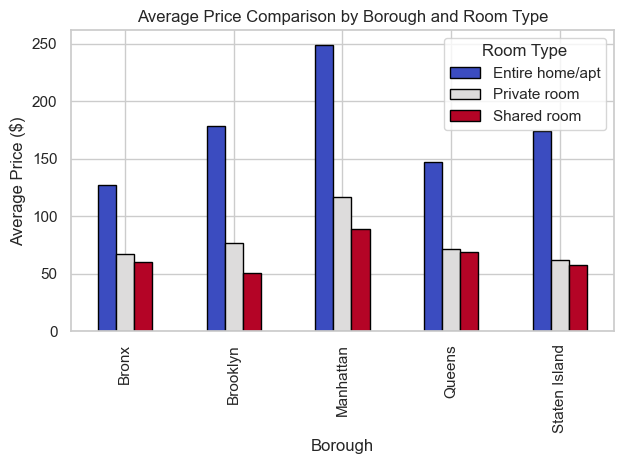

In [25]:
# 💸 Let's explore how different room types are priced across each borough

# Step 1: Create a pivot table to compare average price across room types and boroughs
price_pivot_table = df.pivot_table(
    values='price',
    index='neighbourhood_group',
    columns='room_type',
    aggfunc='mean'
)

# Step 2: Visualize it with a clean grouped bar chart
plt.figure(figsize=(12, 7))
price_pivot_table.plot(kind='bar',edgecolor='black', colormap='coolwarm')

plt.title("Average Price Comparison by Borough and Room Type")
plt.xlabel("Borough")
plt.ylabel("Average Price ($)")
plt.legend(title="Room Type")
plt.tight_layout()
plt.show()


In [26]:
# now we are finding the overpriced listings
overpriced = df[(df['price']>300) & (df['reviews_per_month'] < 0.5)]
print(overpriced[['name', 'price', 'reviews_per_month', 'neighbourhood_group']].head())

                                                  name  price  \
61                  Sunny & Spacious Chelsea Apartment    375   
85                 perfect for a family or small group    800   
114  2 BR / 2 Bath Duplex Apt with patio! East Village    350   
121                   3 Story Town House in Park Slope    400   
158                   Luxury Brownstone in Boerum Hill    475   

     reviews_per_month neighbourhood_group  
61                0.12           Manhattan  
85                0.24            Brooklyn  
114               0.06           Manhattan  
121               0.24            Brooklyn  
158               0.27            Brooklyn  


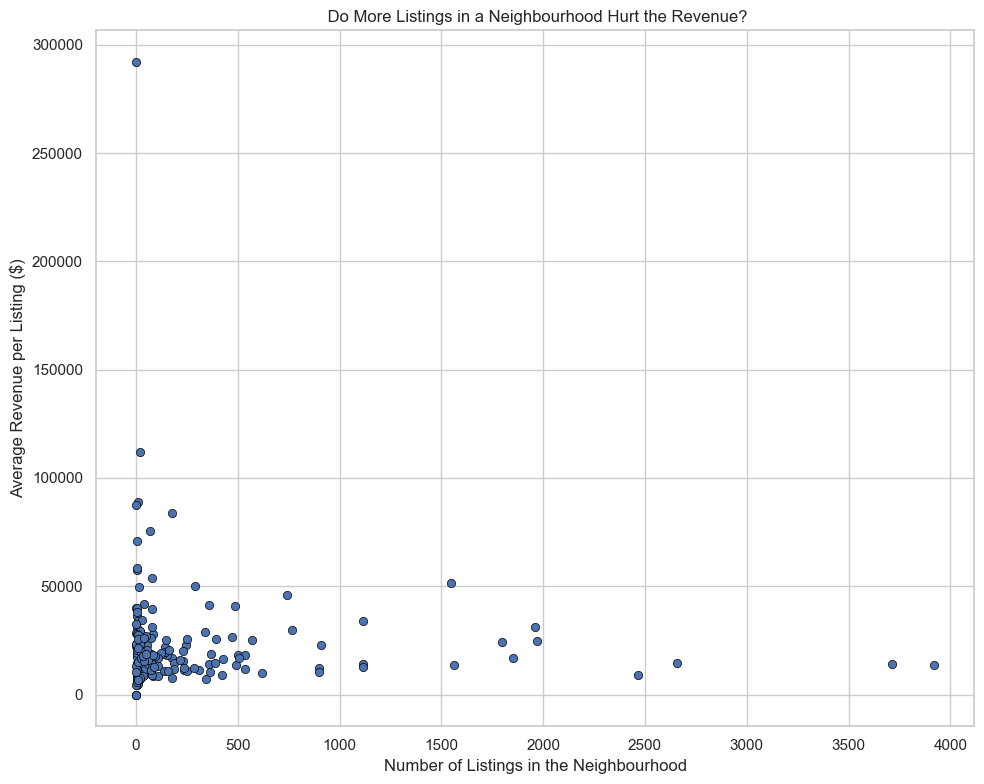

In [27]:
# Saturation vs Revenue per Neighbourhood
neighbourhood_stats = df.groupby('neighbourhood').agg({
    'revenue': 'mean',
    'name': 'count'  # using 'name' as a proxy to count listings
}).reset_index()

# Step 2: Clean column names for better clarity
neighbourhood_stats.rename(columns={'name': 'listing_count'}, inplace=True)

# Step 3: Visualize the relationship — is there saturation in any areas?
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=neighbourhood_stats,
    x='listing_count',
    y='revenue',
    edgecolor='black'
)

plt.title(" Do More Listings in a Neighbourhood Hurt the Revenue?")
plt.xlabel("Number of Listings in the Neighbourhood")
plt.ylabel("Average Revenue per Listing ($)")
plt.tight_layout()
plt.show()

<!-- # Segmenting Listings for Smart Price Predictions
# To build smart and realistic price recommendations, I focused on a few specific factors from the dataset. These segments helped me understand what kind of listings make more revenue, and why.

# Neighbourhood Group
# I grouped listings based on neighbourhood_group since location is one of the most direct factors affecting revenue. For example, listings in Manhattan or Brooklyn tend to earn more than those in Staten Island. This helps spot high-revenue zones.

# Room Type
# I kept room_type separate while analyzing because an entire home and a shared room are priced very differently. Grouping them together would’ve messed up the insight, so I looked at each type’s revenue contribution individually.

# Host Listings Count
# I used calculated_host_listings_count to check how many listings are managed by a single host. Hosts with more properties might run their listings like a business, and I wanted to see if that affected their revenue.

# Minimum Nights
# I filtered out listings with less than 30 minimum nights to focus on short- to medium-term stays. Then I checked: Do listings with lower minimum night requirements earn more revenue?

# Top 10 Neighbourhoods
# I also identified the top 10 neighbourhoods that bring in the most average revenue. This helps to know where Airbnb activity is concentrated and profitable.

# Overpriced Listings
# I tried spotting overpriced listings by checking where price > 300 and reviews_per_month < 0.5. These listings are probably charging a lot but not getting much engagement - so maybe the price isn't justified.

# Saturation vs Revenue
# I compared how saturated a neighbourhood is (in terms of total listings) and how much revenue those listings generate. The idea is: Is more supply always a good thing? Or are fewer listings earning more?

# Availability
# I segmented availability_365 into Low, Medium, and High availability. This helps in figuring out whether listings that are open more often actually make more money or not.

# Reviews per Month
# I used this to find high-performing listings. A higher number of reviews per month usually means the listing is getting regular bookings and guests are engaging - basically, a strong signal of success. -->

# Segmenting Listings for Smart Price Predictions

To build smart and realistic price recommendations, I focused on a few specific factors from the dataset. These segments helped me understand what kind of listings make more revenue, and why.

# 1.Neighbourhood Group :

I grouped listings based on neighbourhood_group since location is one of the most direct factors affecting revenue. For example, listings in Manhattan or Brooklyn tend to earn more than those in Staten Island. This helps spot high-revenue zones.



# 2.Room Type :

I kept room_type separate while analyzing because an entire home and a shared room are priced very differently. Grouping them together would’ve messed up the insight, so I looked at each type’s revenue contribution individually.



# 3.Host Listings Count :

I used calculated_host_listings_count to check how many listings are managed by a single host. Hosts with more properties might run their listings like a business, and I wanted to see if that affected their revenue.



# 4.Minimum Nights :

I filtered out listings with less than 30 minimum nights to focus on short- to medium-term stays. Then I checked: Do listings with lower minimum night requirements earn more revenue?



# 5.Top 10 Neighbourhoods :

I also identified the top 10 neighbourhoods that bring in the most average revenue. This helps to know where Airbnb activity is concentrated and profitable.



# 6.Overpriced Listings :

I tried spotting overpriced listings by checking where price > 300 and reviews_per_month < 0.5. These listings are probably charging a lot but not getting much engagement - so maybe the price isn't justified.



# 7.Saturation vs Revenue :

I compared how saturated a neighbourhood is (in terms of total listings) and how much revenue those listings generate. The idea is: Is more supply always a good thing? Or are fewer listings earning more?



# 8.Availability :

I segmented availability_365 into Low, Medium, and High availability. This helps in figuring out whether listings that are open more often actually make more money or not.



# 9.Reviews per Month :

I used this to find high-performing listings. A higher number of reviews per month usually means the listing is getting regular bookings and guests are engaging - basically, a strong signal of success.

In [28]:
# creating a new column to categorize availability
df['availability_category'] = pd.cut(
    df['availability_365'],
    bins=[-1, 100, 250, 366],
    labels=['Low', 'Medium', 'High']
)

In [29]:
#now creating a new column to catgorize minimum nights
df['minimum_nights_category'] = pd.cut(
    df['minimum_nights'],
    bins = [-1,3,7,15],
    labels=['Short stays','Medium stays','Long stays']
)

In [30]:
# and finally creating an another new column to categorize reviews per month   
df['reviews_per_month_category'] = pd.cut(
    df['reviews_per_month'],
    bins = [-1,3,5,15],
    labels = ['Low engagement','Moderate','High engagement']
)

In [31]:
df.groupby(['availability_category'])['revenue'].mean()

C:\Users\TANIMA\AppData\Local\Temp\ipykernel_24388\835859163.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['availability_category'])['revenue'].mean()


availability_category
Low        2559.269869
Medium    28971.405063
High      59765.924190
Name: revenue, dtype: float64

In [32]:
df.groupby(['room_type', 'minimum_nights_category'])['revenue'].mean().sort_values(ascending = False)


C:\Users\TANIMA\AppData\Local\Temp\ipykernel_24388\1179114761.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['room_type', 'minimum_nights_category'])['revenue'].mean().sort_values(ascending = False)


room_type        minimum_nights_category
Entire home/apt  Short stays                25543.222105
                 Medium stays               18324.026720
                 Long stays                 15795.376331
Private room     Short stays                11379.303672
Shared room      Short stays                10461.243213
Private room     Medium stays                8908.174571
Shared room      Long stays                  6456.924528
                 Medium stays                6234.009259
Private room     Long stays                  5943.269042
Name: revenue, dtype: float64

Entire home/apt with Short stays generates the most revenue

In [33]:
df.groupby(['room_type', 'availability_category'])['revenue'].mean().sort_values(ascending=False)


C:\Users\TANIMA\AppData\Local\Temp\ipykernel_24388\3766766641.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['room_type', 'availability_category'])['revenue'].mean().sort_values(ascending=False)


room_type        availability_category
Entire home/apt  High                     84816.982441
                 Medium                   39774.059084
Private room     High                     34627.459943
Shared room      High                     19009.212963
Private room     Medium                   15491.557085
Shared room      Medium                   15134.712121
Entire home/apt  Low                       3276.742198
Shared room      Low                       2091.025168
Private room     Low                       1793.301322
Name: revenue, dtype: float64

Entire home/apt with High availability earns the most revenue

In [34]:
df.groupby(['neighbourhood', 'reviews_per_month_category'])['revenue'].mean().sort_values(ascending=False).head(10)


C:\Users\TANIMA\AppData\Local\Temp\ipykernel_24388\2870765686.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['neighbourhood', 'reviews_per_month_category'])['revenue'].mean().sort_values(ascending=False).head(10)


neighbourhood      reviews_per_month_category
Fort Wadsworth     Low engagement                292000.000000
Randall Manor      Low engagement                131868.437500
Riverdale          Low engagement                 97540.800000
Flatiron District  Moderate                       92120.111111
Willowbrook        Low engagement                 87399.000000
Tribeca            Low engagement                 85388.535294
Battery Park City  Low engagement                 78279.164179
Nolita             Moderate                       75545.235294
Neponsit           Low engagement                 70670.000000
East Flatbush      High engagement                69844.043478
Name: revenue, dtype: float64

Surprisingly, many of the top-earning neighbourhoods (like Fort Wadsworth and Randall Manor) had low engagement, which could mean they’re luxury or high-value properties that get fewer, high-paying bookings.

On the flip side, East Flatbush made it into the top 10 with high engagement, proving that volume bookings with cheaper prices can also add up to big revenue.

This shows us that both pricing strategy and review frequency matter - some listings make big revenue through fewer, high-value bookings, while others do it through volume and consistency.

In [35]:
df[(df['price'] > 300) & (df['reviews_per_month_category'] == 'Low engagement')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenue,availability_category,minimum_nights_category,reviews_per_month_category
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.120000,1,180,67500,Medium,NaN,Low engagement
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.240000,1,7,5600,Low,Short stays,Low engagement
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2019-05-18,0.550000,2,243,121500,Medium,Medium stays,Low engagement
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.060000,4,298,104300,High,Short stays,Low engagement
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2018-12-30,0.240000,2,216,86400,Medium,Short stays,Low engagement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,2019-07-07,1.373221,1,364,127400,High,Short stays,Low engagement
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,2019-07-07,1.373221,1,64,30400,Low,Short stays,Low engagement
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,2019-07-07,1.373221,1,23,18400,Low,Short stays,Low engagement
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,2019-07-07,1.373221,1,9,3150,Low,Short stays,Low engagement


To help optimize pricing, I filtered out listings that are priced above $300 but receive very few reviews per month (less than 1). These are potentially overpriced listings with low engagements.

An example:
 A private room in *Sheepshead Bay* priced at $800/month but has near-zero engagement.

In [36]:
# dropping the columns that are not necessary for modelling

my_model = df.drop(columns = ['id','name','host_id','host_name','last_review','neighbourhood'])

my_model = my_model.dropna()

# Converting categorical variables into dummy variables
my_model = pd.get_dummies(my_model, drop_first = True)

my_model.head()


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenue,neighbourhood_group_Brooklyn,...,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,availability_category_Medium,availability_category_High,minimum_nights_category_Medium stays,minimum_nights_category_Long stays,reviews_per_month_category_Moderate,reviews_per_month_category_High engagement
0,40.64749,-73.97237,149,1,9,0.210000,6,365,54385,True,...,False,False,True,False,False,True,False,False,False,False
1,40.75362,-73.98377,225,1,45,0.380000,2,355,79875,False,...,False,False,False,False,False,True,False,False,False,False
2,40.80902,-73.94190,150,3,0,1.373221,1,365,54750,False,...,False,False,True,False,False,True,False,False,False,False
3,40.68514,-73.95976,89,1,270,4.640000,1,194,17266,True,...,False,False,False,False,True,False,False,False,True,False
4,40.79851,-73.94399,80,10,9,0.100000,1,0,0,False,...,False,False,False,False,False,False,False,True,False,False


In [37]:
from sklearn.model_selection import train_test_split

#defining features and target
features = my_model.drop(['price'], axis=1)
target_price = my_model['price']


#Splitting into training and testing sets (70% train, 30% test)
features_train , features_test , target_price_train, target_price_test = train_test_split(
    features ,target_price, test_size = 0.3 , random_state = 42
)

In [38]:
# now we are training our model with linear regression
from sklearn.linear_model import LinearRegression

# initializing the model
model = LinearRegression()

#training the model
model.fit(features_train, target_price_train)

LinearRegression()

In [39]:
# now we are generating predicted prices for your test data.
predicted_price = model.predict(features_test)

In [40]:
# now we are evaluating the performance
from sklearn import metrics


def check_model_accuracy(actual_values, predicted_values):
    print("MEAN ABSOLUTE ERROR (MAE): ", metrics.mean_absolute_error(actual_values, predicted_values))
    print("MEAN SQUARED ERROR(MSE): ", metrics.mean_squared_error(actual_values, predicted_values))
    print("ROOT MEAN SQUARED ERROR (RMSE): ", np.sqrt(metrics.mean_squared_error(actual_values, predicted_values)))
    print("R2 SCORE: ",metrics.r2_score(actual_values, predicted_values))

In [41]:
predicted_values = model.predict(features_test)
check_model_accuracy(target_price_test, predicted_values)

MEAN ABSOLUTE ERROR (MAE):  48.97868292445843
MEAN SQUARED ERROR(MSE):  23605.462107631807
ROOT MEAN SQUARED ERROR (RMSE):  153.64069157495942
R2 SCORE:  0.518624260674992


In [42]:
#checking the price factor... for model accuracy
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [43]:
# as we can already see, someone has listed their Airbnb at ₹10,000 per night . so our data is bascially skewed here. Hence we are fixing it for a normal price range
my_model['log_price'] = np.log1p(my_model['price'])

In [44]:
# now we will be trying a different and new model. so we are redefining our features and target

features = my_model.drop(['price','log_price'],axis = 1)
# using the log- transfromed price as a new target
target = my_model['log_price']

In [45]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=7
)


In [46]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100,random_state = 7)
forest.fit(features_train, target_train)

predictions = forest.predict(features_test)

In [47]:
# now we are evaluating its performance
  
from sklearn import metrics
check_model_accuracy(np.expm1(target_test), np.expm1(predictions))

MEAN ABSOLUTE ERROR (MAE):  28.698734429723817
MEAN SQUARED ERROR(MSE):  22034.601278138667
ROOT MEAN SQUARED ERROR (RMSE):  148.4405647999854
R2 SCORE:  0.5041294261200575


so these are just basically two models but in both the cases the R2 is around 0.50 and it is leaving more space for improvements.. so now we will be working on the further improvement of the model

In [48]:
cols_to_drop = [col for col in df.columns if 'neighbourhood_group_' in col]
df = df.drop(columns=cols_to_drop)


In [49]:
df.to_csv("finally_cleaned_for_tableau_1.csv", index=False)
